# Final Project Part 1 ( House price Predication )
Machine Learning: Supervised - Linear Regression in Python

In [1]:
pip install matplotlib seaborn

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline



In [3]:
# Load the dataset Overview and into a pandas dataframe

dataframe = pd.read_csv ("BostonHousing.csv")
dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
# dataset info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


DataFrame info: 506 entries, 14 columns, various dat types, some missing values

# Preprocess the dataset

In [5]:
# We can clean the dateset and missing values
dataframe.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [6]:
# Handle missing values if any
dataframe.dropna(inplace=True)

# Perform the exploratory data analysis (EDA) in the dataset.

In [7]:
# print shape of dataset
print('Number of Instances : ', dataframe.shape[0])
print('Number of features : ', dataframe.shape[1])

Number of Instances :  506
Number of features :  14


In [8]:
# show statistical summary of numerical data
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Univariate Analysis

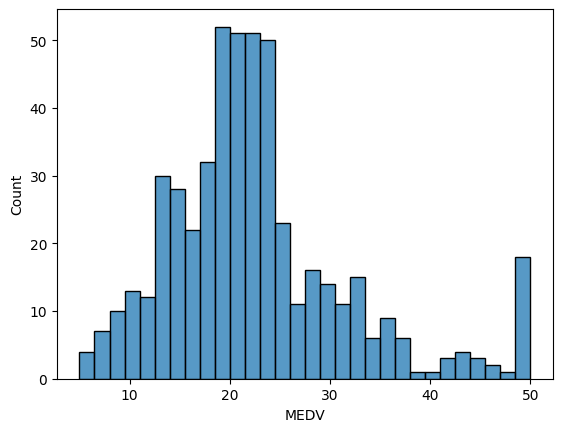

In [9]:
# Histogram for MEDV
sns.histplot(dataframe ['MEDV'], bins = 30)
plt.show()

The MEDV appears to have a neary normal distribution without skew, which cen be processed

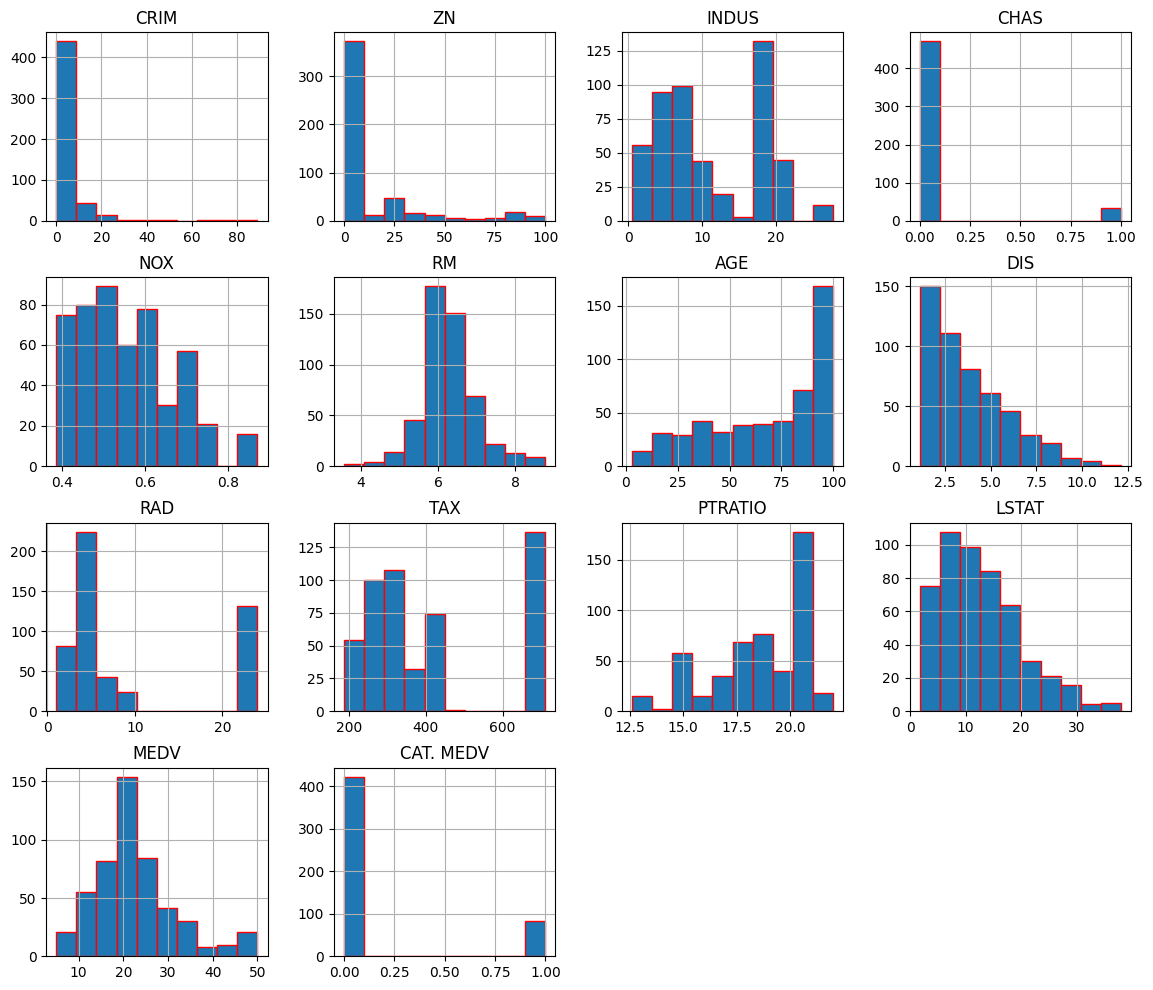

In [10]:
# Creating Histogram for each distribution of the varibales
dataframe.hist(edgecolor = 'Red', figsize = (14, 12))
plt.show()

# Obersations:
Histograms show the distribution of data points. CRIM, ZN, and LSTAT are skewed right, indicating a concentration of lower values with fewer high values. RM appears normally distributed, suggesting most homes have a moderate number of rooms. AGE and DIS indicate a range of old to new houses and varied proximity to employment centers. TAX and RAD show clusters, indicating common tax rates and highway access levels. CHAS, with most values at 0, suggests few properties are by the river. MEDV shows house value distribution, and CAT. MEDV suggests most homes fall below a certain value threshold. These visualizations help in understanding the spread and concentration of data points across the variables.

# Bivariate Analysis

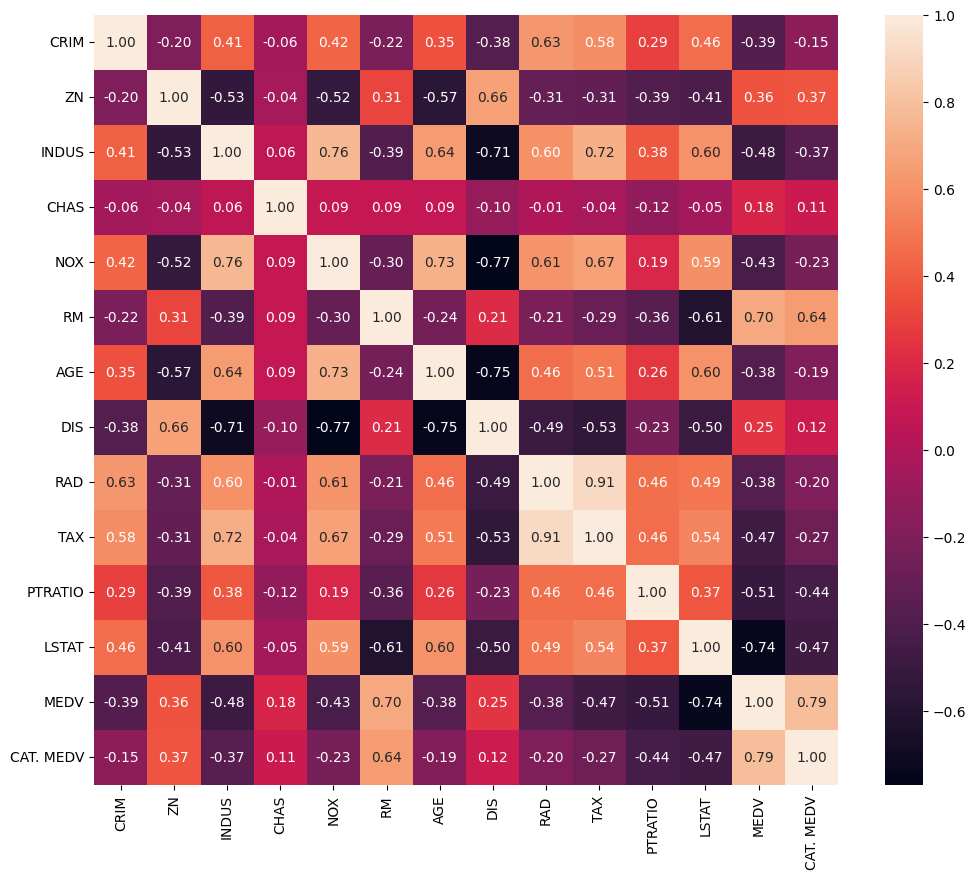

In [11]:
# Correlation heatmap Useing
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.corr(), annot =True, fmt = ".2f")
plt.show()

# Observations:


- Values close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values near 0 show little to no linear relationship.
- A high positive value between RAD and TAX suggests towns with more highways tend to have higher tax rates.
- A high negative correlation between DIS and NOX implies that closer proximity to employment centers often coincides with lower air quality.
- RM seems to have a higher positive correlation with MEDV and CAT. MEDV
- LSTAT seems highly negatively correlated with MEDV and CAT. MEDV
- CRIM, AGE, and RAD are also positively correlated with MEDV and CAT.MEDV seems to have a higher positive correlation with those independent variables compared to MEDV.
- CRIM seems to have a positive correlation with RAD and TAX



# Scatter plots

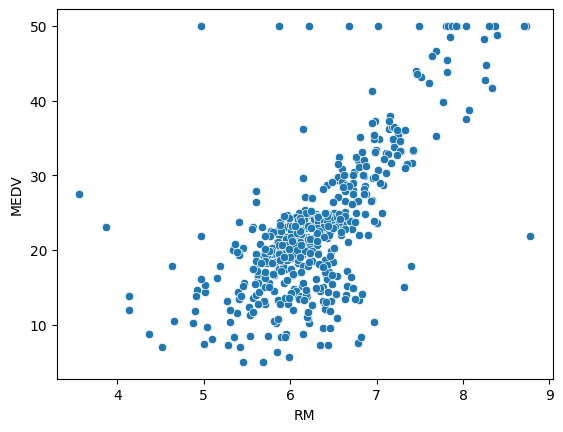

In [12]:
# scatter plot to visulaize the relationship between RM Vs MEDV
sns.scatterplot(data = dataframe, x = "RM", y = "MEDV")
plt.show()

Observation:
- The price of the house seems to increase as the values of RM increases that's expected as the prices is generally higher for more rooms.
- There are a few outliers in a horizontal line as the MEDV values seems to be capped at 50

# Creating Box Plots

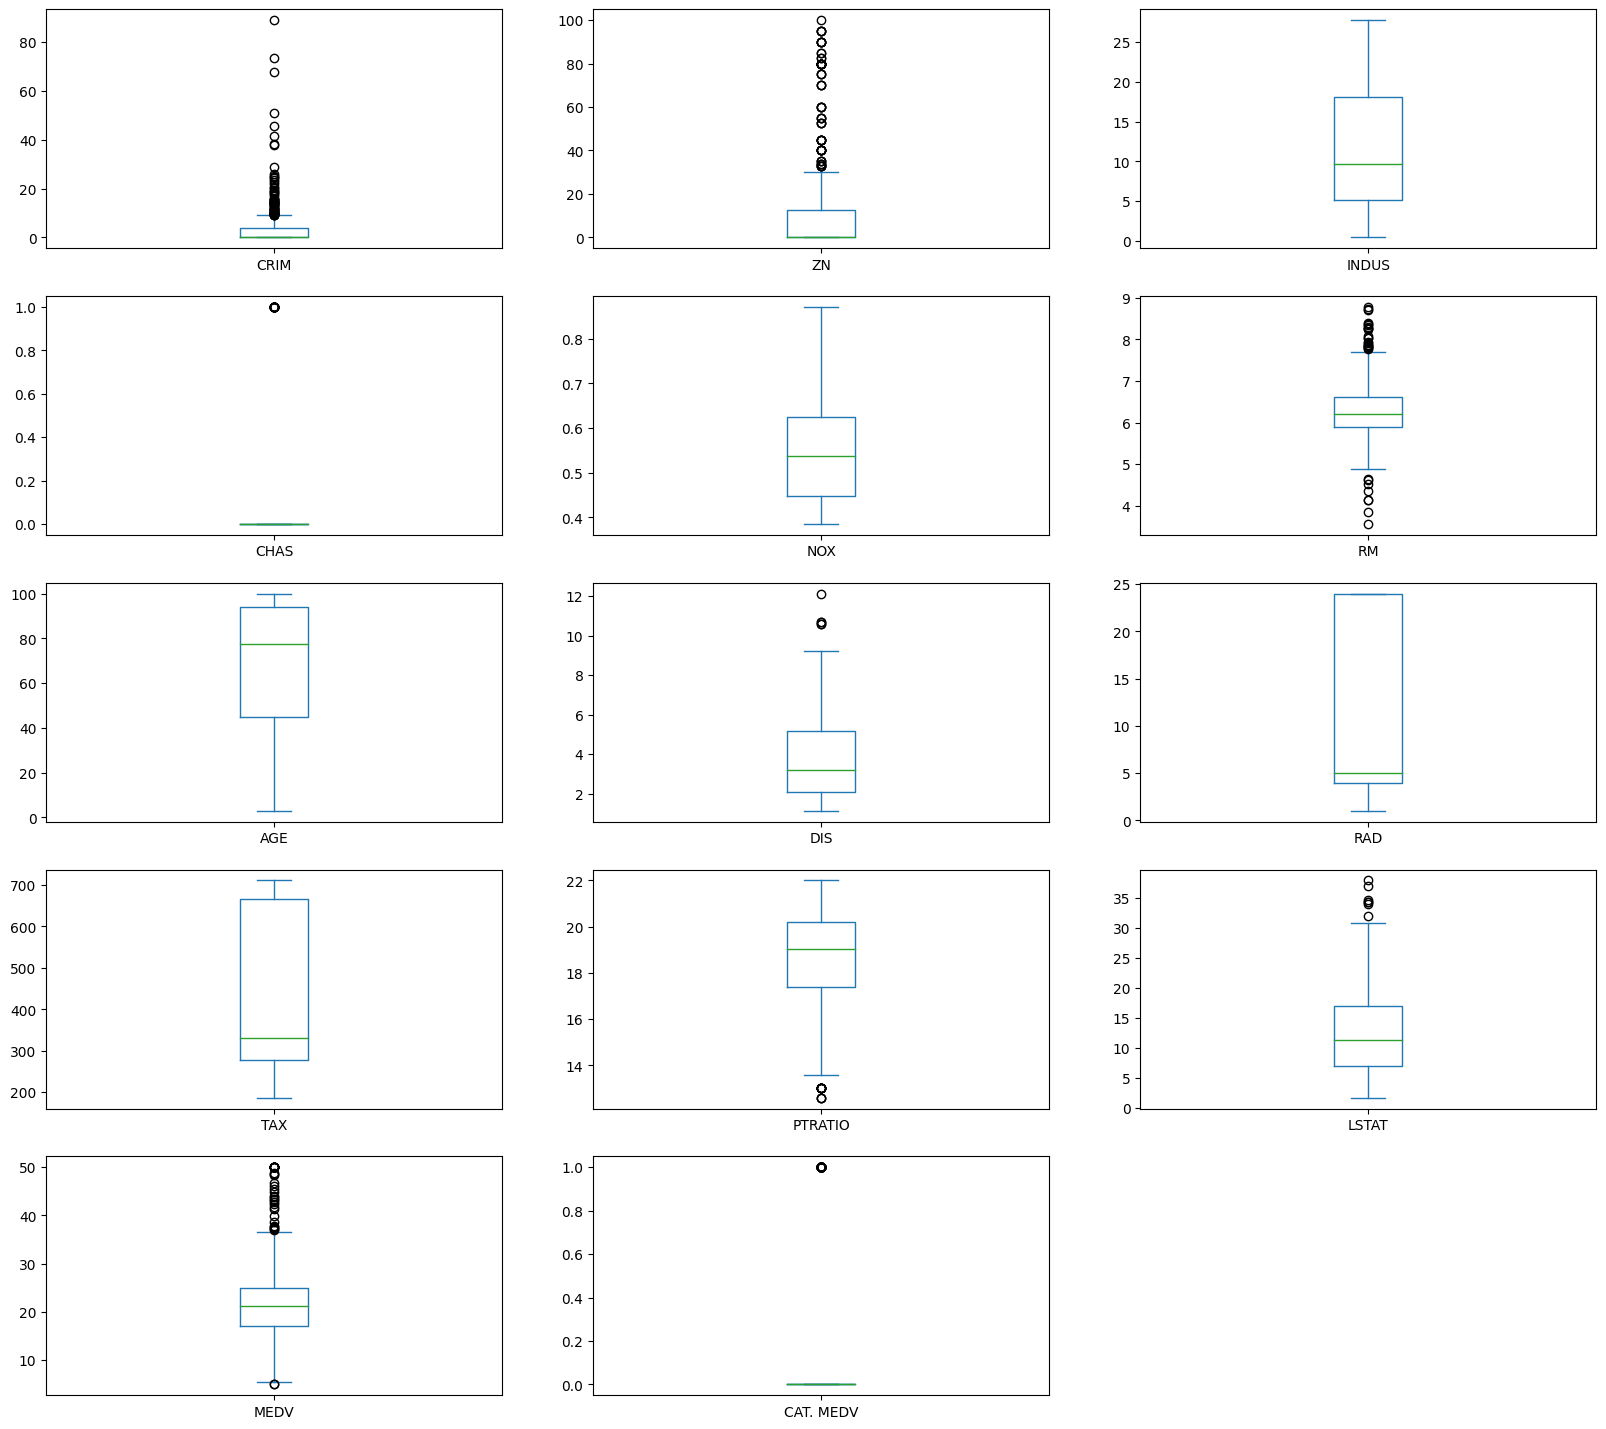

In [13]:
dataframe.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

# Step 4 Separate the dataset into the input and output NumPy arrays


In [14]:
# Split the dataset into input and output arrays
X = dataframe.drop("MEDV", axis=1).values
y = dataframe["MEDV"].values

# Display the shapes of the input and output arrays
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (506, 13)
y shape: (506,)


The dataset is divided into input and output NumPy arrays in the fourth stage. The target variable (MEDV) is the only variable present in the output array (y), whereas all other variables are present in the input array (X)

# Step 5 Split the input/output arrays into the training/testing datasets

In [15]:
# Use a 70/30 split to divide the input/output arrays into the training and testing datasets.
# Everywhere you need it, use a seed of 7.

from sklearn.model_selection import train_test_split

# Set a seed for reproducibility
seed = 7

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (354, 13)
X_test shape: (152, 13)
y_train shape: (354,)
y_test shape: (152,)


Use a 70/30 split to divide the input/output arrays into the training and testing datasets. Everywhere you need it, use a seed of 7.

The train_test_split() method from Scikit-Learn is used to divide the input/output arrays into training and testing sets in the fifth phase. The model is trained using 70% of the data, and tested using 30%, according to the code's 70/30 split. To ensure that the results can be replicated, the random_state option is set to 7

# Step 6 Build and Train the Model

In [16]:
# Create a linear regression model object
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

LinearRegression()

The LinearRegression() class from Scikit-Learn is used in the sixth step to create and train a linear regression model on the training data.

# Step 7 Calculate the R2 Values

R2 score: 0.8235857791570557


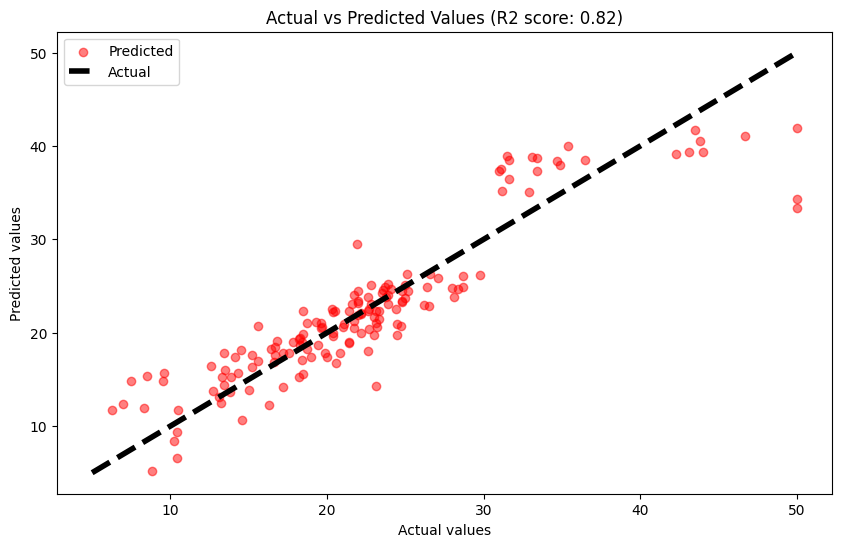

In [17]:
#from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Display the R2 score
print("R2 score:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Actual')
plt.title(f'Actual vs Predicted Values (R2 score: {r2:.2f})')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

- The value R-squared (R2) is a statistic that measures the portion of the outcome variation explained by the model's inputs. An R2 of 1 means perfect prediction, 0 means the model predicts no better than the average outcome, and a negative R2 indicates the model performs worse than just using the average. It helps to assess the model's accuracy in predicting data.
- The value R-squared (R2) score of 0.82, the model has a high level of predictive accuracy, it’s indicating less accuracy in the predictions for those values.


# Step 8 Predict the "Median value of owner-occupied homes in 1000 dollars"
- It is assumed that two new suburbs/towns/developments have been established in the Boston area. The agency has collected the housing data of these two new suburbs/towns/developments.

- Makeup two housing records to be used as predictors (all 5 variables except MEDV). You can choose any numbers you like. Hint: Look at the mean of each variable and choose a number close to that and then possibly take a value within the min/max and see how this changes the outcome.

- Use these two new records as the new data, feed them into the model to predict the median value of owner-occupied homes in 1000’s dollars.

- For each predictor, the student should clearly present the value of each predictor.

Predicted value: 36.52756556971715


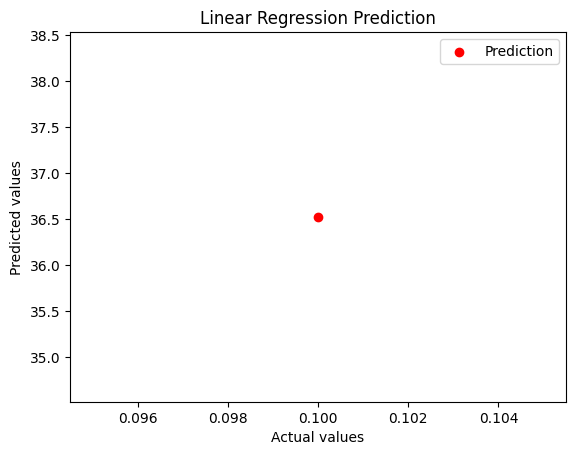

In [18]:
# Make a prediction for a new data point
new_data = np.array([[0.1, 18, 2.5, 0.5, 6, 70, 3, 2.5, 10, 400, 20, 400, 10]])
prediction = lr_model.predict(new_data)

# Display the predicted value
print("Predicted value:", prediction[0])
# Plot the prediction as a red point
plt.scatter(new_data[:, 0], prediction, color='red', label='Prediction')

# Adding labels and legend
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Prediction')
plt.legend()

# Show plot
plt.show()


# Step 9 Evaluate the model using the 10-fold cross-validation

In [19]:
from sklearn.model_selection import cross_val_score

# Calculate the cross-validation score
cv_score = cross_val_score(lr_model, X, y, cv=10)

# Display the cross-validation score
print("Cross-validation score:", cv_score.mean())

Cross-validation score: 0.5130037202325773


Cross-validation scores: [ 0.78728013  0.77163074 -0.04735138  0.78583874  0.71735972  0.69539698
  0.55832355  0.46846597 -0.16638564  0.55947839]
Mean cross-validation score: 0.5130037202325773


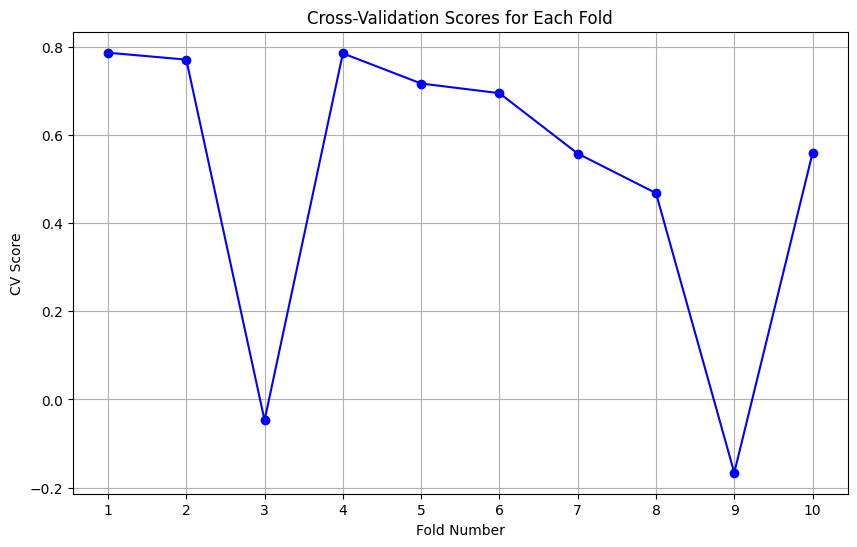

In [20]:
# Display the cross-validation score
print("Cross-validation scores:", cv_score)
print("Mean cross-validation score:", cv_score.mean())

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_score, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Scores for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('CV Score')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

The model will be assessed using 10-fold cross-validation in the last stage. The code computes the cross-validation score, which is a gauge of how effectively the model generalises to new data, using the cross_val_score() function from Scikit-Learn. The user sees the overall cross-validation score

# Linear Regression  Build and Train the Model:
Discussion of the ethical concerns Comparing with Random Forest Regressor, XGBoost Regressor, SVM Regressor

In [21]:
# # Load the dataset Overview
data = pd.read_csv ("BostonHousing.csv")
# data.head(5)

# We can clean the dateset and missing values
data.isnull().sum()

# Handle missing values if any
dataframe.dropna(inplace=True)

# Split the dataset into input and output arrays
X = data.drop("MEDV", axis=1).values
y = data["MEDV"].values

In [22]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

Training the Model

In [23]:
# Import library for Linear Regression

from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [24]:
# Model prediction on train data
y_pred = lm.predict(X_train)

R^2: 0.8414010824968472
Adjusted R^2: 0.8353370062393737
MAE: 2.470761845814791
MSE: 11.937872104054614
RMSE: 3.455122588860577


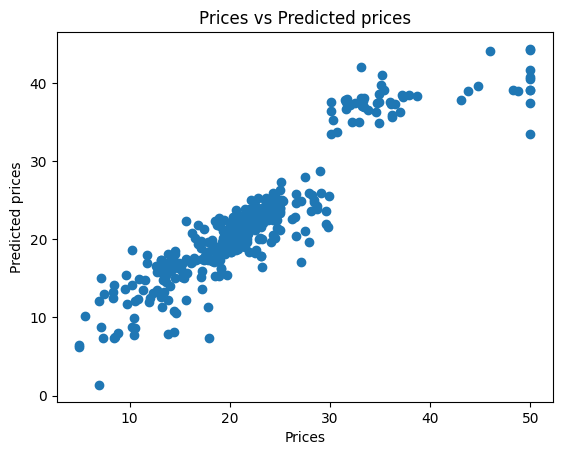

In [25]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

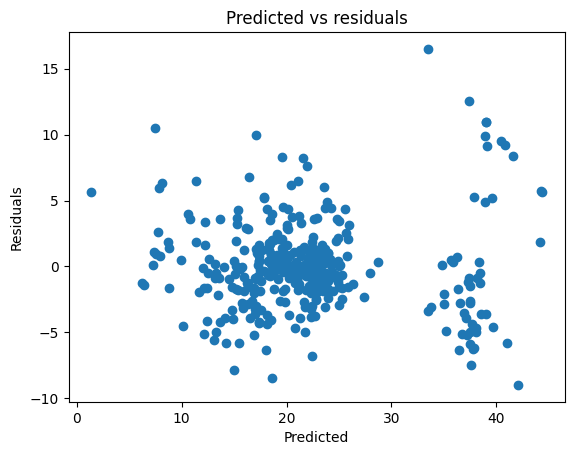

In [26]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# For Test data

In [27]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [28]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8282476420395907
Adjusted R^2: 0.8120680720867985
MAE: 3.181336453546118
MSE: 17.93439363280514
RMSE: 4.2349018445301825


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Random Forest Regressor
Train the model


In [29]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [30]:
# Model prediction on train data
y_pred = reg.predict(X_train)

R^2: 0.9863523167944653
Adjusted R^2: 0.9858304936130773
MAE: 0.7494717514124284
MSE: 1.0272724378531066
RMSE: 1.013544492290845


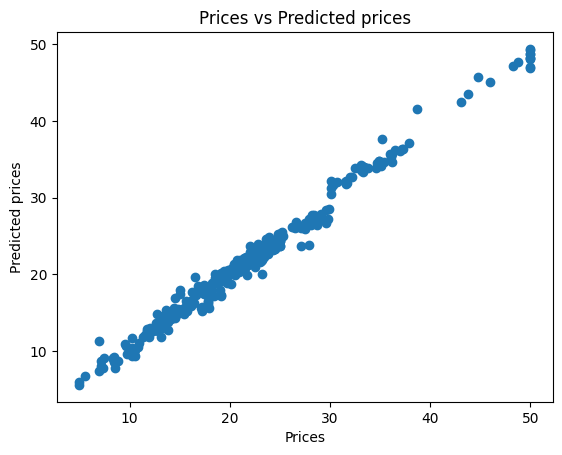

In [31]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

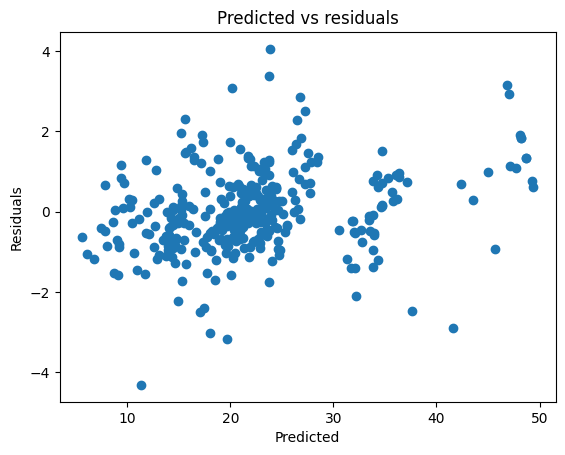

In [32]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# For Test Data

In [33]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [34]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9171679831741177
Adjusted R^2: 0.9093649670963172
MAE: 2.1351842105263152
MSE: 8.649325184210529
RMSE: 2.9409735096070704


# XGBoost Regressor
Training the model

In [35]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

- max_depth (int) – Maximum tree depth for base learners.
- learning_rate (float) – Boosting learning rate (xgb’s “eta”)
- n_estimators (int) – Number of boosted trees to fit.
- gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
- min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.
- subsample (float) – Subsample ratio of the training instance.
- colsample_bytree (float) – Subsample ratio of columns when constructing each tree.
- objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).
- nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)
- scale_pos_weight (float) – Balancing of positive and negative weights.

# Model Evaluation

In [36]:
# Model prediction on train data
y_pred = reg.predict(X_train)

R^2: 0.9999971337737482
Adjusted R^2: 0.9999970241827445
MAE: 0.010238739056775834
MSE: 0.0002157432279690282
RMSE: 0.014688200297144242


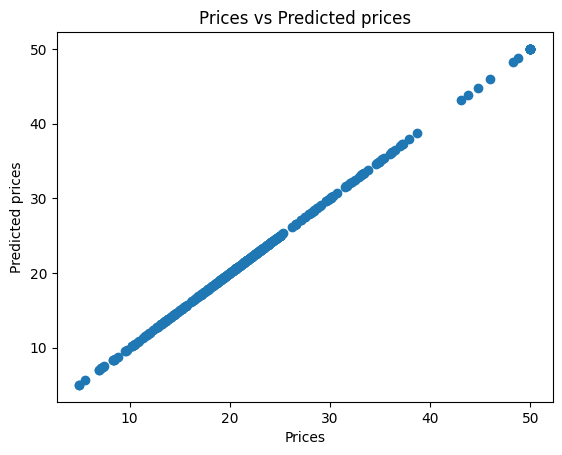

In [37]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

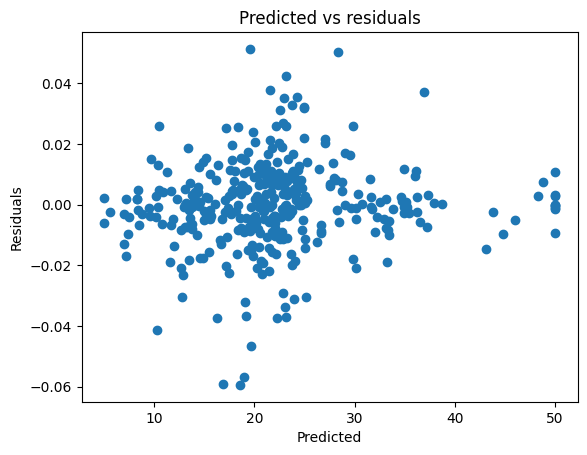

In [38]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# For test data

In [39]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [40]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8974572137913375
Adjusted R^2: 0.8877973861050141
MAE: 2.2988646846068534
MSE: 10.707525147891445
RMSE: 3.272235497009872


# SVM Regressor

In [41]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model

In [42]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [43]:
# Train the model using the training sets
reg.fit(X_train, y_train)

SVR()

# Model Evaluation

In [44]:
# Model prediction on train data
y_pred = reg.predict(X_train)

R^2: 0.701944593484767
Adjusted R^2: 0.6905483573533022
MAE: 2.656200288570808
MSE: 22.43487773382895
RMSE: 4.736547026455976


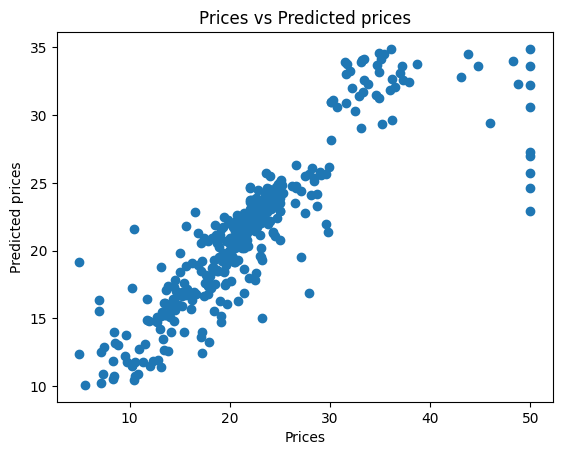

In [45]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

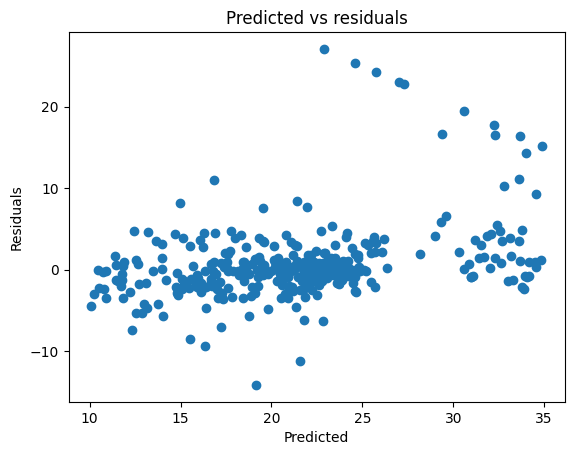

In [46]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# For test data

In [47]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [48]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6549051060963801
Adjusted R^2: 0.6223961668156043
MAE: 3.5374033490571284
MSE: 36.0348337655154
RMSE: 6.002902111938475


# Evaluation and comparision of all the models

In [49]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,91.716798
2,XGBoost,89.745721
0,Linear Regression,82.824764
3,Support Vector Machines,65.490511


https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction

In [ ]:
# Final Part 1